<center>
    <h1>Reconocimiento de patrones y aprendizaje automático</h1>
    <h1>Tarea 4: Clustering</h1>
    <h2>González Alvarado Raúl : 313245312</h2>
</center>

## 1. Introducción

El archivo `iris.csv` contiene información sobre las mediciones 
de 150 lirios: 3 clases diferentes con 50 instancias cada una. 
Cada columna del archivo representa la siguiente información:
- Longitud del sépalo (cm.)
- Ancho del sépalo (cm.)
- Longitud del pétalo (cm.)
- Ancho del pétalo (cm.)
- Tipo de lirio

## 2. Ejercicios

**1.** Utiliza los algoritmos _Hierarchical clustering_, _K-Means_ y _DBSCAN_ 
para obtener los grupos (clusters) de las diferentes clases de lirios.

**2.** Utiliza al menos tres formas de evaluar los resultados de los algoritmos 
utilizados (Disimilaridad, pureza, entropía, inercia, Silhouette).

**3.** Recuerda que K-Means es sensible a las posiciones iniciales de los 
centroides. Realiza varias ejecuciones con posiciones iniciales diferentes.

**4.** Recuerda que DBSCAN es sensible al radio ($\epsilon$) y al número de 
elementos en la vecindad (**MinPts**). Prueba diferentes valores de estos 
parámetros hasta que estés conforme con el agrupamiento realizado.

**5.** ¿Cuál es el número óptimo de clusters para este conjunto de datos? 
Justifica tu respuesta.

**6.** Compara los resultados entre los diferentes algoritmos de agrupamiento, 
¿cuál es el mejor algoritmo para clasificar este conjunto de datos?

**7.** Interpreta los resultados:
- ¿Cuáles son las características comunes de cada grupo? ¿Cuáles son sus diferencias?
- ¿Los grupos coinciden con los tipos de lirios? De no ser así, ¿hay más o menos grupos
que tipos de lirios? ¿Cuál es el significado de esta diferencia?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
target = "type"
iris = pd.read_csv("./iris.csv", names=features+[target])

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Son 150 datos con 4 atributos y una etiqueta representando la especie de planta.
Recordemos que todas las medidas están en centímetros.

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No hay ningún dato que sea `null` y todos los atributos son `float64`
menos la etiqueta, que es `string`.

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


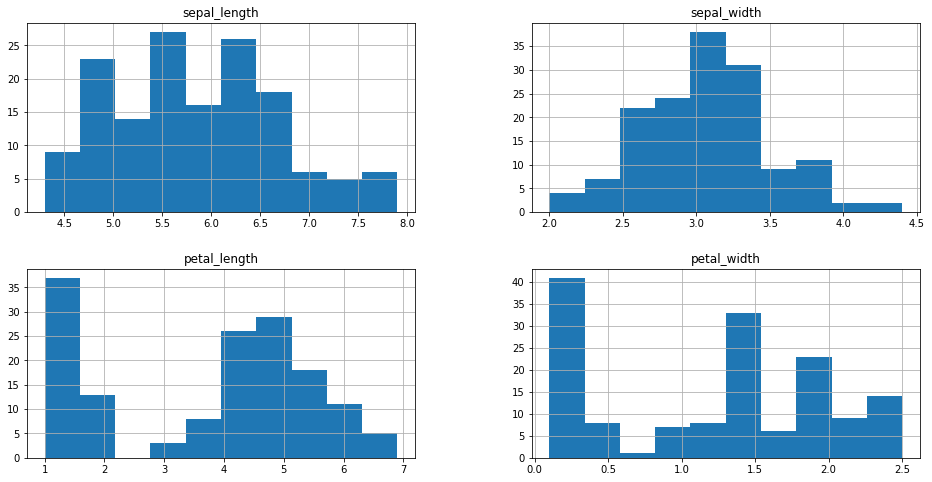

In [6]:
iris.hist(figsize=(16,8))
plt.show()

In [7]:
target_code = "type_code"
iris[target_code] = iris[target].apply(lambda t: np.where(iris[target].unique() == t)[0][0])
iris

,sepal_length,sepal_width,petal_length,petal_width,type,type_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [8]:
def plot_features(df, features, labels):
    plt.figure(figsize=(17,17))
    for i, f1 in enumerate(features):
        for j, f2 in enumerate(features):
            plt.subplot(len(features), len(features), len(features)*i + j + 1)
            if i == j: 
                plt.xticks([])
                plt.yticks([])
                plt.scatter([],[])
            else:
                plt.scatter(df[f1], df[f2], c=labels, marker=".")
                plt.xlabel(f1)
                plt.ylabel(f2)

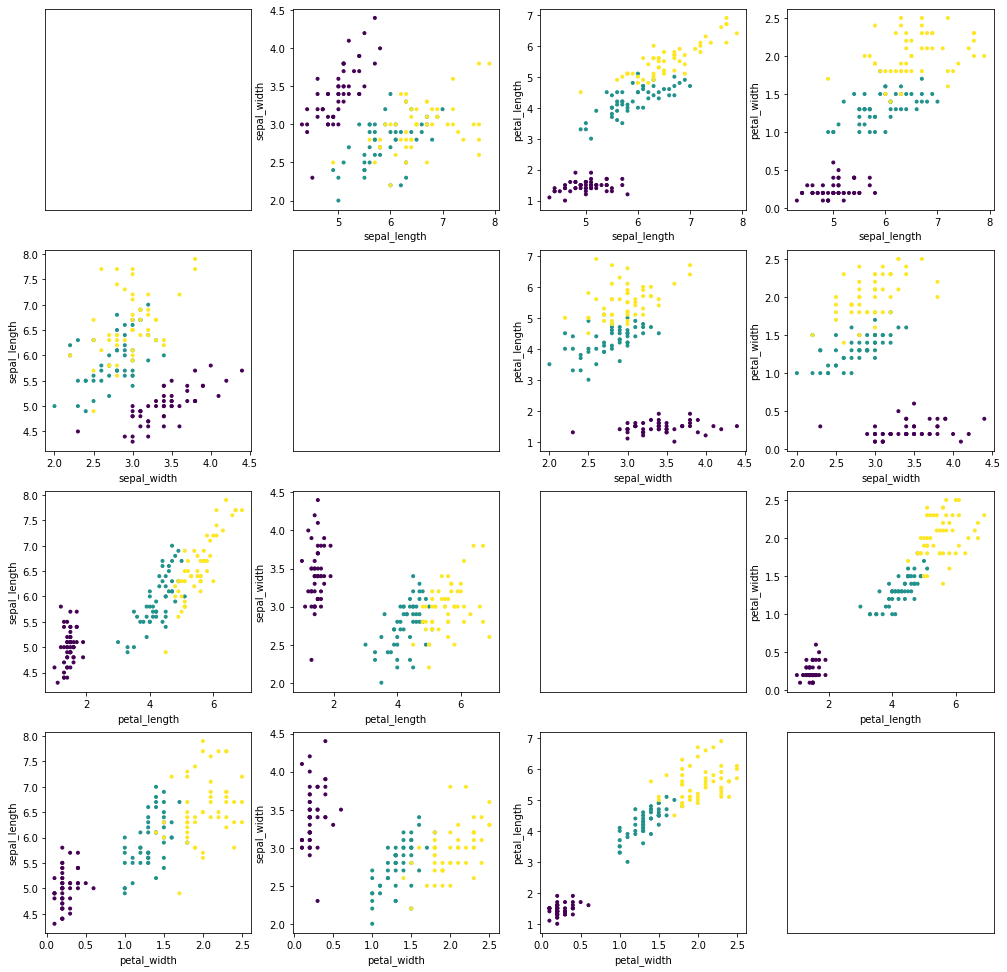

In [9]:
plot_features(iris, features, iris[target_code])
plt.show()

In [10]:
iris[target].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64

Está balanceado en cuanto a clases

In [11]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [12]:
hca = AgglomerativeClustering(n_clusters=3)
hca.fit(iris[features])

AgglomerativeClustering(n_clusters=3)

In [13]:
def compare_labels(l1, l2, f1="petal_length", f2="petal_width"):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(iris[f1], iris[f2], marker=".", c=l1)
    plt.subplot(1,2,2)
    plt.scatter(iris[f1], iris[f2], marker=".", c=l2)

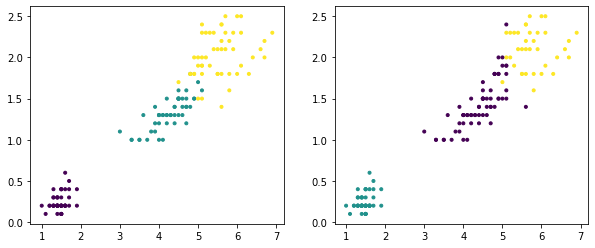

In [14]:
compare_labels(iris[target_code], hca.labels_)

In [15]:
from sklearn.metrics import homogeneity_score, silhouette_score, mutual_info_score

In [16]:
def try_model(get_model):
    scores = {
        "purity": list(),
        "silhouette": list(),
        "entropy": list()
    }

    ks = list(range(1, 11))
    for k in ks:
        model = get_model(k)
        model.fit(iris[features])
        scores["purity"].append(homogeneity_score(iris[target_code], model.labels_))
        if k == 1:
            scores["silhouette"].append(0)
        else:
            scores["silhouette"].append(silhouette_score(iris[features], model.labels_))
        scores["entropy"].append(mutual_info_score(iris[target_code], model.labels_))

    plt.figure(figsize=(17,3))
    for idx, name in enumerate(scores):
        plt.subplot(1, len(scores), idx+1)
        plt.plot(ks, scores[name], "o--")
        plt.xlabel("k")
        plt.ylabel(name)
    plt.show()

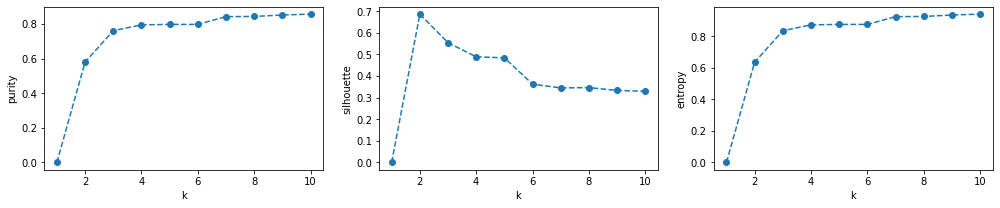

In [17]:
try_model(lambda k: AgglomerativeClustering(n_clusters=k))

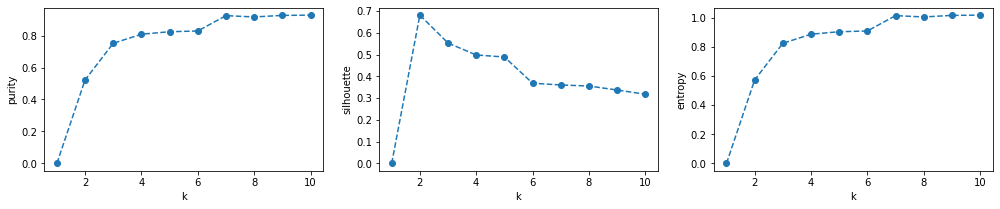

In [18]:
try_model(lambda k: KMeans(n_clusters=k, n_init=30))

In [19]:
# Probar con eps = arrange(0.3,1.1,0.1) y min_samples=arrange(1, 18, 1)
cols = ["eps", "min_pts", "purity", "silhouette", "entropy", "k_clusters"]
dbscan_scores = pd.DataFrame(columns=cols)
eps_range = np.arange(0.3, 1.1, 0.1)
min_pts_range = np.arange(1, 18, 1)
for eps in eps_range:
    for min_pts in min_pts_range:
        dbscan = DBSCAN(min_samples=min_pts, eps=eps)
        dbscan.fit(iris[features])
        purity = homogeneity_score(iris[target_code], dbscan.labels_)
        k_clusters = np.unique(dbscan.labels_).shape[0]
        if k_clusters == 1:
            silhouette = 0
        else:
            silhouette = silhouette_score(iris[features], dbscan.labels_)
        entropy = mutual_info_score(iris[target_code], dbscan.labels_)
        dbscan_scores.loc[len(dbscan_scores)] = [eps, min_pts, purity, silhouette, entropy, k_clusters]

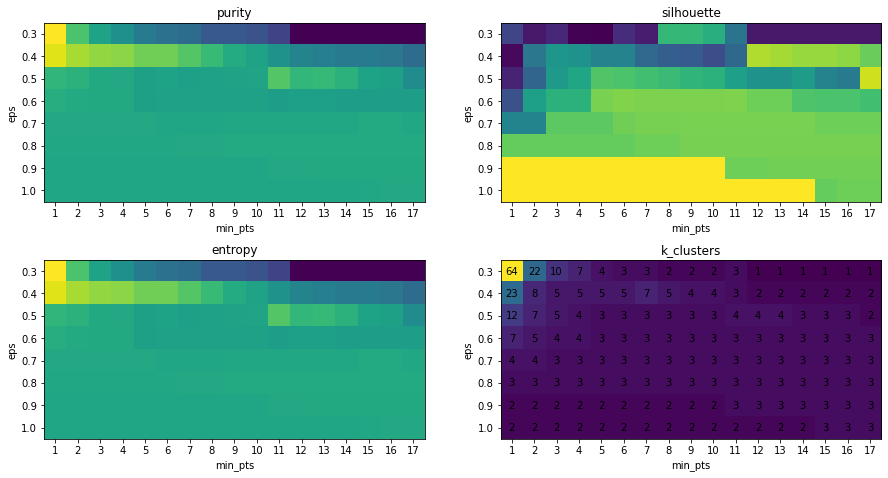

In [20]:
plt.figure(figsize=(15,8))
for i,s in enumerate(cols[2:]):
    scores = dbscan_scores[s].to_numpy().reshape((8, 17))
    plt.subplot(2,2,i+1)
    plt.imshow(scores)
    plt.xlabel("min_pts")
    plt.ylabel("eps")
    plt.xticks(ticks=range(17) ,labels=np.arange(1,18,1))
    plt.yticks(ticks=range(8) ,labels=np.round(np.arange(0.3,1.1,0.1), 1))
    if s == "k_clusters":
        for i in range(eps_range.shape[0]):
            for j in range(min_pts_range.shape[0]):
                plt.text(j, i, int(dbscan_scores["k_clusters"][i*17+j]), ha="center", va="center")
    plt.title(s)
plt.show()

3 clusters
0.6296905771702943 0.3564217375152255 0.6917858061377999


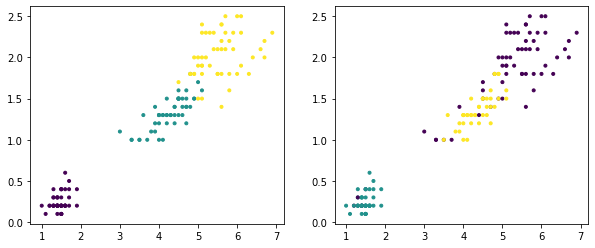

5 clusters
0.8237993997953135 0.33462152239059767 0.9050361440125443


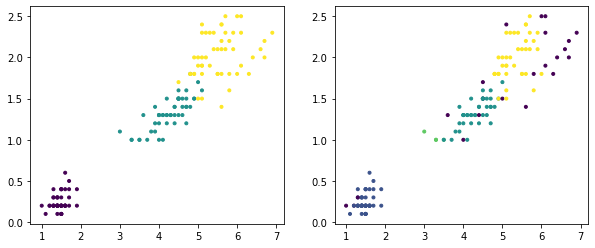

2 clusters
0.5793801642856945 0.6863930543445408 0.6365141682948121


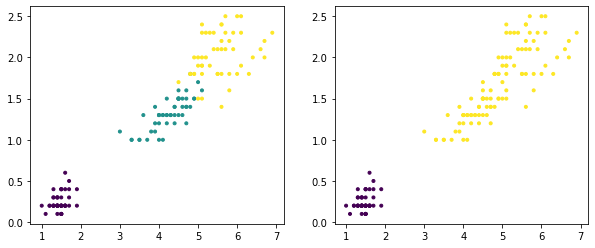

In [21]:
for eps, min_pts in [(0.5, 14), (0.4, 3), (1,1)]:
    dbscan = DBSCAN(min_samples=min_pts, eps=eps)
    dbscan.fit(iris[features])
    print(np.unique(dbscan.labels_).shape[0], "clusters")
    h = homogeneity_score(iris[target_code], dbscan.labels_)
    s = silhouette_score(iris[features], dbscan.labels_)
    e = mutual_info_score(iris[target_code], dbscan.labels_)
    print(h, s, e)
    compare_labels(iris[target_code], dbscan.labels_)
    plt.show()

0.7972974985502317 0.4841553526240121 0.8759208296316288


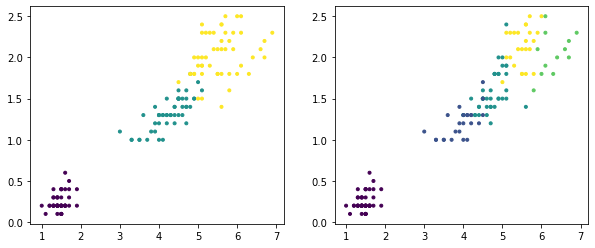

0.8238829320940431 0.4885175508886279 0.9051279136224294


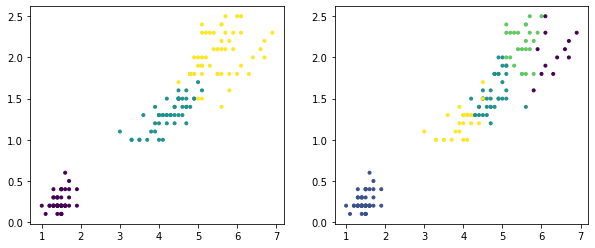

In [22]:
for model in [AgglomerativeClustering(n_clusters=5), KMeans(n_clusters=5)]:
    model.fit(iris[features])
    h = homogeneity_score(iris[target_code], model.labels_)
    s = silhouette_score(iris[features], model.labels_)
    e = mutual_info_score(iris[target_code], model.labels_)
    print(h, s, e)
    compare_labels(iris[target_code], model.labels_)
    plt.show()

### 2.1 Reporte

En el caso de KMeans y HCA vemos que con las métricas supervisadas (entropia y pureza) tenemos un codo
en 3, pero el índice de silhouette tiene un máximo en 2.
Como el índice de silhouette no disminuye mucho en 3, entonces para estos algoritmos decidimos un $k=3$
como el **número óptimo de clusters**.

En el caso de DBSCAN fué más complicado encontrar un agrupamiento con 3 o 4 clusters y con altas entropías
y pureza. Lo que sí se encontró fue que también con 2 clusters (parámetros `eps=1` y `min_pts=1`) se 
consigue un alto índice de silhouette. En el caso de querer clasificar yo eligiría 5 clusters (parámetros
`eps=0.4`, `min_pts=3`) ya que aumenta mucho la entropía y pureza, lo que significa que en cada cluster hay
una mayoría de cada clase.

Si no tuvieramos los datos etiquetados me quedaría con 2 clusters ya que son los mejores resultados que
se obtuvieron con los 3 algoritmos usando silhouette.

En el caso de **clasificar** los datos, me quedaría con DBSCAN o KMeans seleccionando 5 clusters, ya que
su pureza y entropía es la máxima en los tres algoritmos.

Los grupos **no coinciden** con la cantidad de tipos de lirios, en caso de clasificación serían 5 clusters
y en caso de no saber las etiquetas de antemano serían 2 clusters. Lo primero se debe a que los algoritmos
no logran captar totalmente la estructura de las 3 clases usando 3 clusters, pero logran capturar subgrupos
dentro de estas categorías.
En el caso de los 2 clusters, como hay dos clases que son muy parecidas, todos los algoritmos los toman en
cuenta cómo si fueran el mismo grupo porque son muy parecidos, y por lo tanto son muy cercanos.